<a href="https://colab.research.google.com/github/srishagorasa1/HR-Analytics/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HR Analytics

In [1]:
## importing libraries that are required
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset from a csv file
df = pd.read_csv("HR_comma_sep.csv");
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#dimensions of the dataset
df.shape

(14999, 10)

This dataset has around 15000 employees with 10 distinct observations

In [4]:
# changing the text categorial varible salary to number category 
salary_category = {'low': 0, 'medium': 1, 'high':2}
df["salary"] = df["salary"].map(salary_category)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [5]:
# overview of our dataset
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000


We can see that on an average around 24% of the employees have left the organization with the average satisfaction level of each employee being 61%

In [6]:
# for consistency changing all coulmns names to lowercase
df.columns = map(str.lower, df.columns)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [7]:
# renaming the sales column to a more descriptive name - department
df.rename(columns={'sales':'department'},inplace=True)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [8]:
# finding the presence of missing values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

It looks like our dataset is clean and has no missing or undefined values

# **Exploring the dataset**

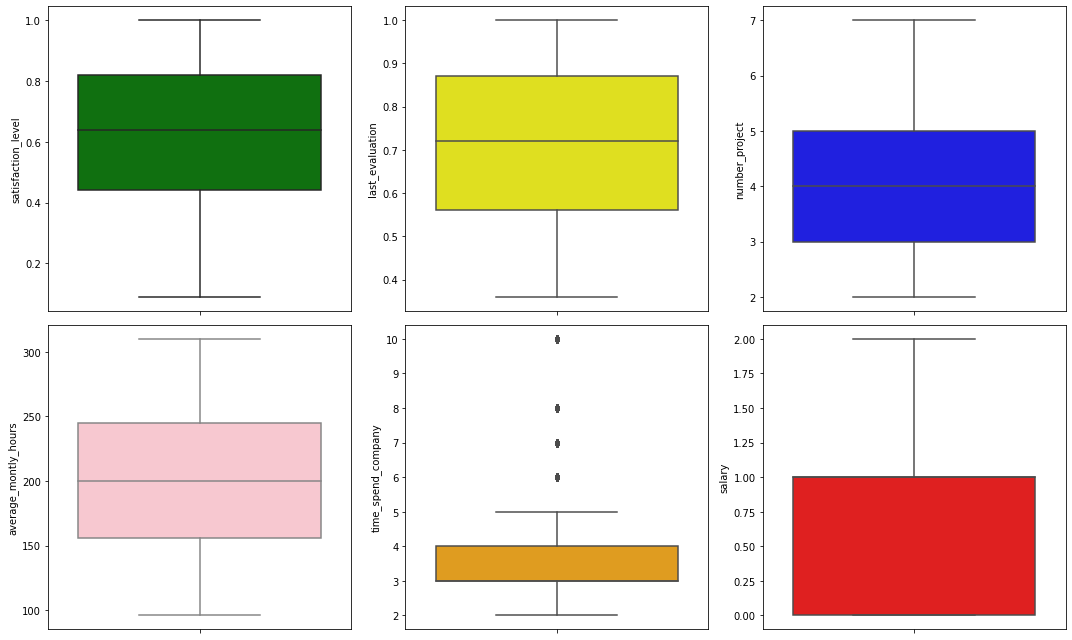

In [11]:
fig, axs = plt.subplots(ncols=3,nrows=2,figsize=(15,9))
sns.boxplot(y='satisfaction_level',data=df,color='Green',ax=axs[0,0])
sns.boxplot(y='last_evaluation',data=df,color='Yellow',ax=axs[0,1])
sns.boxplot(y='number_project',data=df,color='Blue',ax=axs[0,2])
sns.boxplot(y='average_montly_hours',data=df,color='Pink',ax=axs[1,0])
sns.boxplot(y='time_spend_company',data=df,color='Orange',ax=axs[1,1])
sns.boxplot(y='salary',data=df,color='Red',ax=axs[1,2])
plt.tight_layout()

On exploring our dataset, we found that there aree not many outliers.

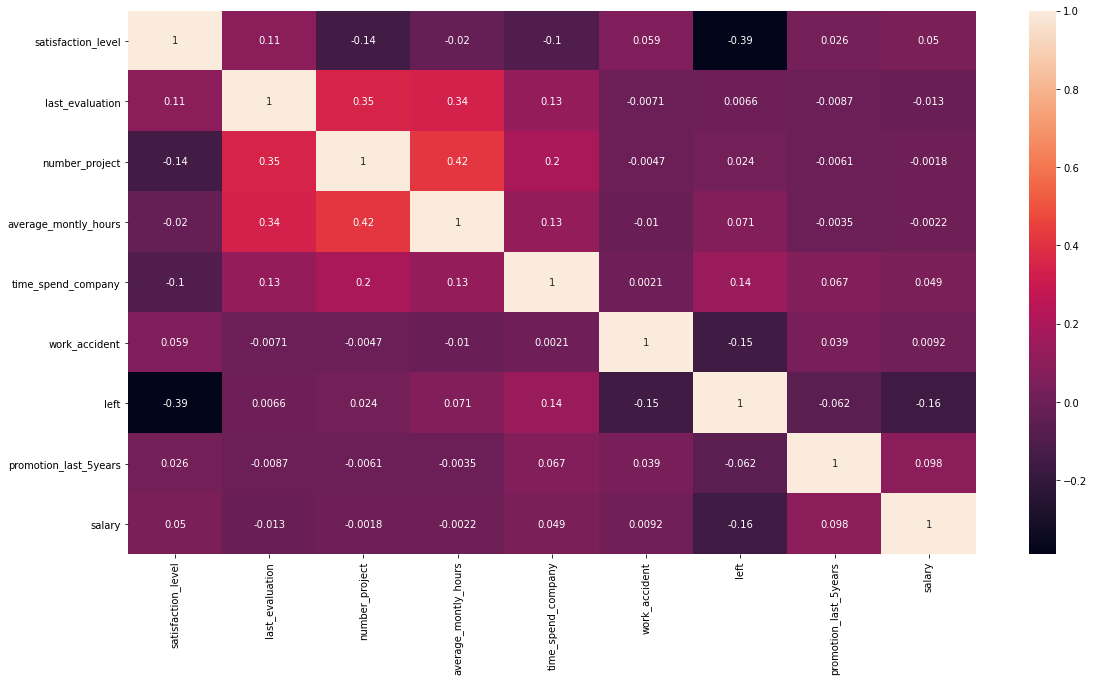

In [12]:
# finding correlation among multiple variables
plt.figure(figsize=(19,10))
sns.heatmap(df.corr(),annot=True)

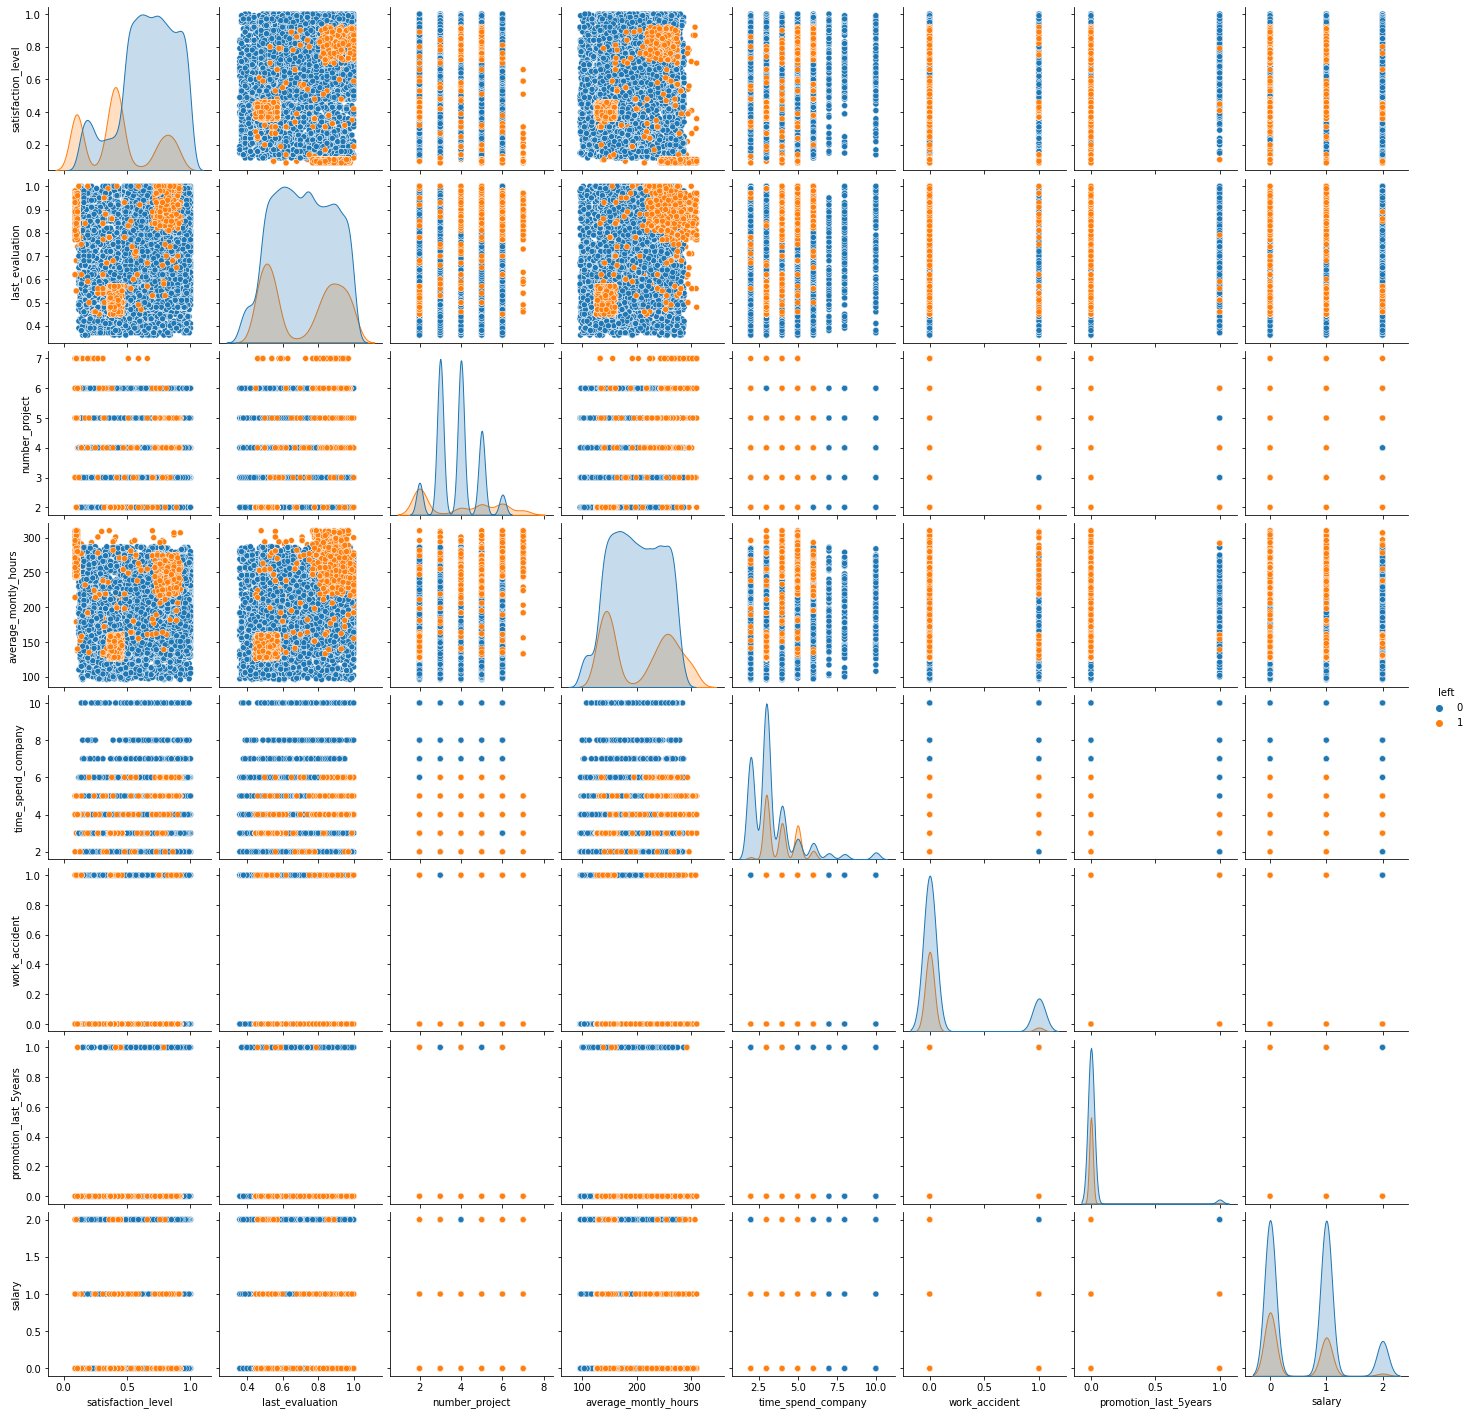

In [13]:
sns.pairplot(df, hue="left")
plt.show()

## **Clustering**

**K-means Clustering**

KMeans clustering is a type of unsupervised learning. This is used to segment data into clusters containing similar data in order to analyse and predict more about the behavior of the different clusters.

In order to decide on the number of clusters to segment the dataset into, lets use **Elbow method**.

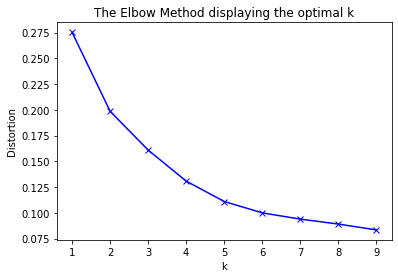

In [14]:
# determine k using elbow method
from scipy.spatial.distance import cdist
 
x1 = np.array(df['satisfaction_level'])
x2 = np.array(df['last_evaluation'])
 
#creating cross product of the two columns and reshaping the data
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
 
# determining k for kmeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    #finding distances between centroids and each point in the array
    #comparing these distances and finding the minimum
    #finding avarage of these minimum distances and appending in the array
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

#Plotting the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method displaying the optimal k')
plt.show()

The Elbow plot above shows the optimum number of plots is k=3

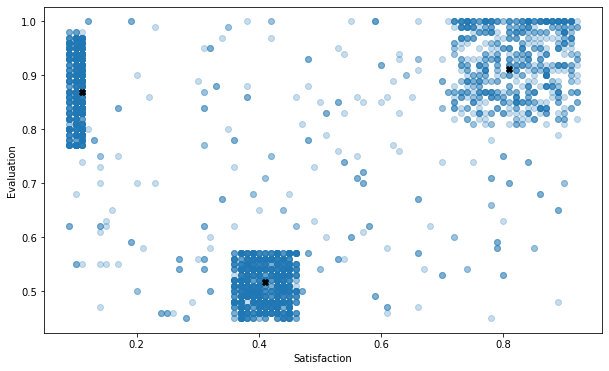

In [15]:
from sklearn.cluster import KMeans
# Graph and create 3 clusters of Employee decision
kmeans = KMeans(n_clusters=3,random_state=2)
X = df[df.left==1][["satisfaction_level","last_evaluation"]]
kmeans.fit(X)

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction_level",y="last_evaluation", data=df[df.left==1],alpha=0.25)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X")
plt.show()

Does the clustering produce interesting groupings?

The above KMeans cluster has produce 3 ineresting groups of clusters.

  a. People with low satisfaction and high evaluation - Unhappy but successful

  b. People with low satisfaction and low evaluation - Unhappy and not successful

  c. People with high satisfaction and high evaluation - Happy and successful

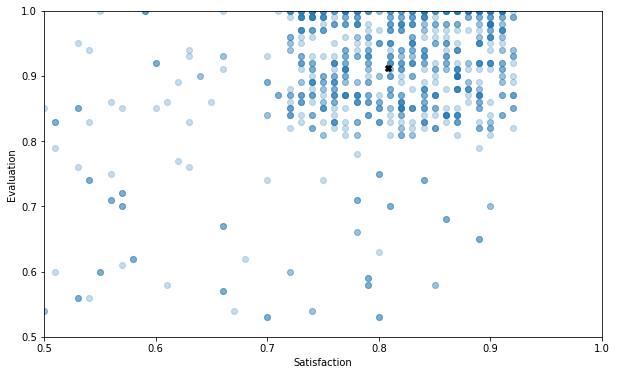

In [16]:
# Graph and create 3 clusters of Employee decision
kmeans = KMeans(n_clusters=3,random_state=2) # flat clustering
X = df[df.left==1][["satisfaction_level","last_evaluation"]]
kmeans.fit(X)

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction_level",y="last_evaluation", data=df[df.left==1],alpha=0.25)
plt.xlabel("Satisfaction")
plt.xlim([0.5, 1])
plt.ylim([0.5, 1])
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X")
plt.show()

Does scaling effect the clustering?

- Scaling would affect the clustering depending on the type of clustering that we perform. Since I am using only Euclidean distance for generating clusters, scaling would be affecting the clusters created in the dataset scale provided.

In [18]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
            colored_labels.append(colors[7]) 
        else:
            colored_labels.append(colors[label])
    return colored_labels

**DBScan Estimator**

Counter({0: 3571})


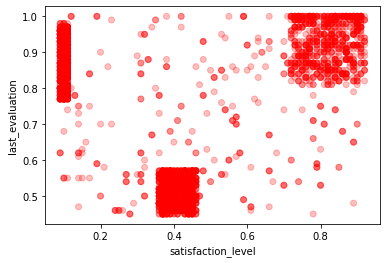

In [19]:
# Fit a DBSCAN estimator
from collections import Counter
estimator = DBSCAN(eps=0.8, min_samples=10)
X = df[df.left==1][["satisfaction_level","last_evaluation"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
# print labels
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(x="satisfaction_level",y="last_evaluation", data=df[df.left==1], alpha=0.25, c=colors)
plt.xlabel("satisfaction_level")
plt.ylabel("last_evaluation")
plt.show()

**Agglomerative Clustering**

Counter({2: 1575, 0: 1068, 1: 928})


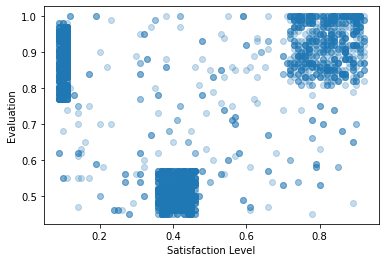

In [20]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=3)
X = df[df.left==1][["satisfaction_level","last_evaluation"]]
estimator.fit(X)

# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(x="satisfaction_level",y="last_evaluation", data=df[df.left==1],alpha=0.25)
plt.xlabel("Satisfaction Level")
plt.ylabel("Evaluation")
plt.show()

Do the clustering methods generate the same clusters?

- Similar clusters are generated for my dataset while using KMeans, DBScan and Hierarchical Clustering.

# **Regression**
Regression is a type of supervised learning. Linear regression is a linear approach for modelling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

In [21]:
df.shape

(14999, 10)

In [22]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In our model, let us assume that the y (the variable we are going to predict) is the 'last_evaluation' and the x (the variable we use to make the predictions) is 'average_monthly_hours'

**Independent variable: 'average_monthly_hours' -- (x)**

**Dependent variable: 'last_evaluation' -- (y)**

Rsiduals are the difference between the true and predicted value of Y

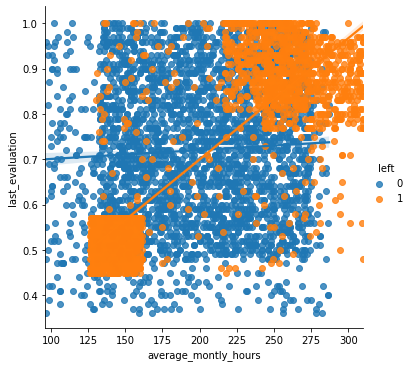

In [23]:
sns.lmplot('average_montly_hours','last_evaluation',data=df[:5000],hue='left')

We can see that there is a linear positive relationship between the two parameters.



**Linear Regression using statsmodel**

OLS method - Ordinary Least Squares method, generally used to reduce the square of distance from the regression line

In [24]:
import statsmodels.api as sm

X = df[['average_montly_hours']]
y = df[['last_evaluation']]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
# Statsmodels gives R-like statistical output
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        last_evaluation   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                          1.913e+05
Date:                Tue, 15 Jun 2021   Prob (F-statistic):                        0.00
Time:                        08:31:51   Log-Likelihood:                          2967.3
No. Observations:               14999   AIC:                                     -5933.
Df Residuals:                   14998   BIC:                                     -5925.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
average_montly_hours     0.0034   7.83e-06    437.339      0.000       0.003       0.003
==============================================================================
Omnibus:                        4.012   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                4.015
Skew:                           0.031   Prob(JB):                        0.134
Kurtosis:                       3.052   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpreting the Table:

The R squared is 0.927 which means that the linear regression model is a very good fit.

The Coef is 0.0034 menas that as 'average_monthly_hours' increases by 1, the 'last_evaluation' increases by 0.0034

The 'average_monthly_hours' has a statistically significant p-value (as it is 0.00) (Is the relationship significant?)

**Adding a constant to our model**

In [25]:
X = sm.add_constant(X) ## let's add an intercept to our model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        last_evaluation   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     1957.
Date:                Tue, 15 Jun 2021   Prob (F-statistic):               0.00
Time:                        08:33:38   Log-Likelihood:                 6112.4
No. Observations:               14999   AIC:                        -1.222e+04
Df Residuals:                   14997   BIC:                        -1.221e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4820      0.005     88.395      0.000       0.471       0.493
average_montly_hours     0.0012   2.63e-05     44.237      0.000       0.001       0.001
==============================================================================
Omnibus:                     1697.076   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.233
Skew:                           0.034   Prob(JB):                    9.46e-102
Kurtosis:                       2.140   Cond. No.                         859.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Earlier, without the constant, we forced the model to pass through the origin. On adding a constant value, the y-intercept is 0.4820 and the slope of 'average_monthly_hours' has become 0.0012.

It seems like last_evaluation is not only dependent on average monthly hours of the employee but also many other factors (correlation matrix)

In [26]:
X_multi = df[['satisfaction_level','number_project','time_spend_company',
              'promotion_last_5years','salary']]
y = df[['last_evaluation']]

In [27]:
model = sm.OLS(y,X_multi).fit()
predictions = model.predict(X_multi)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        last_evaluation   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                          4.698e+04
Date:                Tue, 15 Jun 2021   Prob (F-statistic):                        0.00
Time:                        08:34:05   Log-Likelihood:                          4407.9
No. Observations:               14999   AIC:                                     -8806.
Df Residuals:                   14994   BIC:                                     -8768.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
satisfaction_level        0.3376      0.005     71.787      0.000       0.328       0.347
number_project            0.0952      0.001     98.876      0.000       0.093       0.097
time_spend_company        0.0349      0.001     36.966      0.000       0.033       0.037
promotion_last_5years    -0.0315      0.010     -3.063      0.002      -0.052      -0.011
salary                    0.0134      0.002      5.823      0.000       0.009       0.018
==============================================================================
Omnibus:                      284.417   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.529
Skew:                          -0.321   Prob(JB):                     1.66e-67
Kurtosis:                       3.284   Cond. No.                         37.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpreting the table:

The R squared is much higher 0.94, meaning the model is a very good fit

We can see that 'satisfaction_level' attribute plays a much important role in predicting the 'last_evaluation' parameter (0.33) compared to the other attributes

# **Linear Regression using SKLearn**

**Multiple Linear Regression**

In [28]:
import sklearn
from sklearn.linear_model import LinearRegression
from pandas import Series, DataFrame

X_multi= df[['satisfaction_level','number_project','time_spend_company',
              'promotion_last_5years','salary']]
y = df[['last_evaluation']]

lm = LinearRegression()
model = lm.fit(X_multi,y)
predictions = lm.predict(X_multi)
print(predictions[0:5]) # prediction of variable 'last_evaluation'

[[0.59949984]
 [0.81812615]
 [0.81983844]
 [0.80584091]
 [0.59835926]]


In [29]:
lm.score(X_multi,y)

0.15311825724522166

This lm.score is the $R^2$ of the model and it is similar to the the model we designed using Statsmodel ($R^2=0.115$)

In [30]:
print('The estimated intercept coefficient is %.2f' %lm.intercept_)
# print('The number of coefficient used is %.2f' %len(lm.coef_))

The estimated intercept coefficient is 0.43


The equation now is changed as,

                    y(w,x) = w0 + w1x1 + ... + wpxp

                    where w is the coefficient and w0 is the intercept

In [31]:
coeff_df = DataFrame(X_multi.columns)
coeff_df.columns = ['Features']
lm_coef_list = lm.coef_.ravel() # converting 2D array to 1D array
coeff_df['Coefficient Estimates'] = Series(lm_coef_list)
coeff_df

,Features,Coefficient Estimates
0,satisfaction_level,0.114058
1,number_project,0.049595
2,time_spend_company,0.009389
3,promotion_last_5years,-0.016474
4,salary,-0.006228


**In the multiple regression models are predictor variables independent of all the other predictor variables?**


We can see that 'satisfaction_level' attribute contributes the most in predicting the 'last_evaluation' parameter for an employee as it is the best coefficient estimate compared to the others. The other parameters too contribute to the prediction of the 'last_evaluation' variable.


**In in multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.**

In [32]:
coeff_df['coef_ranked'] = coeff_df['Coefficient Estimates'].rank(ascending=0)
coeff_df

,Features,Coefficient Estimates,coef_ranked
0,satisfaction_level,0.114058,1.0
1,number_project,0.049595,2.0
2,time_spend_company,0.009389,3.0
3,promotion_last_5years,-0.016474,5.0
4,salary,-0.006228,4.0


In [33]:
#removing unsignificant predictors

X_multi = X_multi[['satisfaction_level','number_project','time_spend_company']]

**Training and Testing the dataset**

In [34]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, df['last_evaluation'])

In [35]:
# size of the training
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(11249, 2) (3750, 2) (11249,) (3750,)


In [36]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
#prediction the X train values to check the how accurate the training is done..
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [38]:
print("Fit a model X_train, to calculate the MSE of Y_train prediction: %.2f" % np.mean((Y_train-pred_train)**2))

Fit a model X_train, to calculate the MSE of Y_train prediction: 0.03


In [39]:
print("Fit a model X_train, to calculate the MSE of Y_test prediction: %.2f" % np.mean((Y_test-pred_test)**2))

Fit a model X_train, to calculate the MSE of Y_test prediction: 0.03


**Residual Plots**

Text(0.5, 1.0, 'Residual plot')

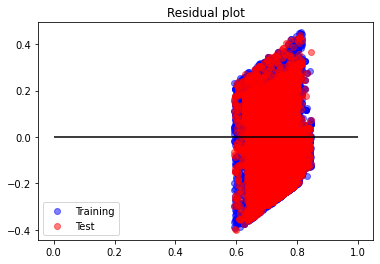

In [40]:
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)
plt.hlines(y=0, xmin=0,xmax=1)
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual plot')

In [41]:
y_null = np.zeros_like(Y_test, dtype=float)
y_null.fill(Y_test.mean())
y_null[0:33]

array([0.71566133, 0.71566133, 0.71566133, 0.71566133, 0.71566133,
       0.71566133, 0.71566133, 0.71566133, 0.71566133, 0.71566133,
       0.71566133, 0.71566133, 0.71566133, 0.71566133, 0.71566133,
       0.71566133, 0.71566133, 0.71566133, 0.71566133, 0.71566133,
       0.71566133, 0.71566133, 0.71566133, 0.71566133, 0.71566133,
       0.71566133, 0.71566133, 0.71566133, 0.71566133, 0.71566133,
       0.71566133, 0.71566133, 0.71566133])

In [42]:
from sklearn import metrics
y_null_rmse =np.sqrt(metrics.mean_squared_error(Y_test, y_null))
y_null_rmse

0.17244509069523808

The null - RMSE value is computed to be 0.17

In [43]:
y_null_rmse/Y_test.mean()

0.24095907192867516

# **Regularization**

Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them towards zero. It reduces model variance which minimizes overfitting.

In [44]:
from sklearn.linear_model import Lasso, Ridge

**Ridge Regression**

In [45]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,Y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Text(0.5, 1.0, 'Ridge Regression - Evaluation vs Predicted Evaluation: $Y_i$ vs $\\hat{y}_i$')

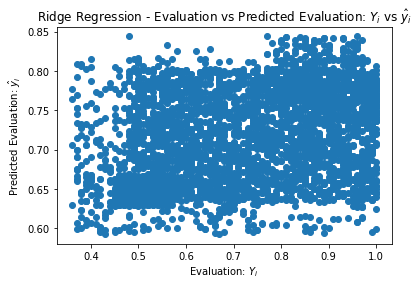

In [46]:
y_pred = ridge.predict(X_test)

plt.scatter(Y_test, y_pred)
plt.xlabel("Evaluation: $Y_i$")
plt.ylabel("Predicted Evaluation: $\hat{y}_i$")
plt.title("Ridge Regression - Evaluation vs Predicted Evaluation: $Y_i$ vs $\hat{y}_i$")

In [47]:
rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
rmse

0.16292128847840343

The RMSE value calcualted using Ridge Regression is 0.16

**Lasso Regression**

In [48]:
lasso = Lasso(fit_intercept=True, alpha=0.5)
lasso.fit(X_train,Y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Text(0.5, 1.0, 'Lasso Regression - Evaluation given vs Predicted Evaluation: $Y_i$ vs $\\hat{y}_i$')

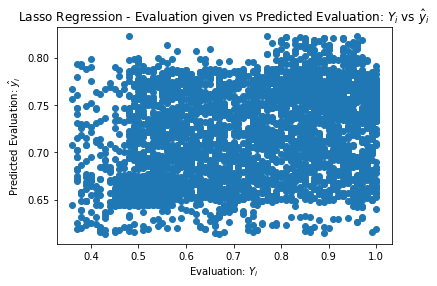

In [49]:
y_pred = lasso.predict(X_test)

plt.scatter(Y_test, y_pred)
plt.xlabel("Evaluation: $Y_i$")
plt.ylabel("Predicted Evaluation: $\hat{y}_i$")
plt.title("Lasso Regression - Evaluation given vs Predicted Evaluation: $Y_i$ vs $\hat{y}_i$")

In [50]:
rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
rmse

0.1630916882088025

The RMSE value calculated using Lasso Regression is 0.16

In [51]:
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X_multi,df['last_evaluation'])
# size of the training
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(11249, 3) (3750, 3) (11249,) (3750,)


In [52]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
#prediction
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [54]:
print("Fit a model X_train, and calculate the Mean squared error(MSE) with Y_train : %.2f"
     % np.mean((Y_train-pred_train)**2))

Fit a model X_train, and calculate the Mean squared error(MSE) with Y_train : 0.02


In [55]:
print("Fit a model X_train, and calculate the Mean squared error(MSE) with Y_test and X_test: %.2f"
     % np.mean((Y_test-pred_test)**2))

Fit a model X_train, and calculate the Mean squared error(MSE) with Y_test and X_test: 0.02


Text(0.5, 1.0, 'Residual plot')

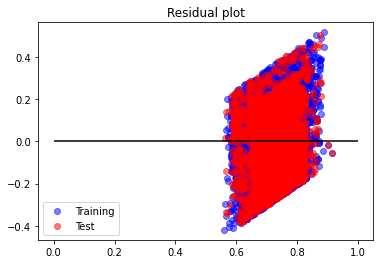

In [56]:
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

plt.hlines(y=0, xmin=0,xmax=1)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual plot')

**Does regularization help with creating models that validate better on out of sample data?**

Both Ridge and Lasso Regression was performed for regularization and it shows that the RMSE value reduced from 0.17 to 0.16, thus helping us in validating the data much better.

# **Logistic Regression**

In [57]:
# create a data frame for categorical variables
df1 = df.copy()
sal_dummy = pd.get_dummies(df1['salary'],prefix='salary')
sal_dummy.head()

,salary_0,salary_1,salary_2
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [58]:
# drop the categorical variables
df2 = df1.drop(['salary'],axis=1)
df2 = pd.concat([df2,sal_dummy],axis=1)
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary_0,salary_1,salary_2
0,0.38,0.53,2,157,3,0,1,0,sales,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,1,0
2,0.11,0.88,7,272,4,0,1,0,sales,0,1,0
3,0.72,0.87,5,223,5,0,1,0,sales,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,1,0,0


In [59]:
sal_dummy['intercept'] = 1.0
sal_dummy.head()

,salary_0,salary_1,salary_2,intercept
0,1,0,0,1.0
1,0,1,0,1.0
2,0,1,0,1.0
3,1,0,0,1.0
4,1,0,0,1.0


In [60]:
X = df2.columns[1:]
X

Index(['last_evaluation', 'number_project', 'average_montly_hours',
       'time_spend_company', 'work_accident', 'left', 'promotion_last_5years',
       'department', 'salary_0', 'salary_1', 'salary_2'],
      dtype='object')

**Multicolinearity**

Multicolinearity can be avoided by dropping one columns from the dummies. It is used to reduce overfitting.

In [61]:
sal_dummy.drop(['salary_2'],axis=1,inplace=True)

In [62]:
keep = ['left','satisfaction_level', 'number_project', 'average_montly_hours']
sal_dummy = df1[keep].join(sal_dummy.loc[:, 'salary_0':])
sal_dummy.head()

,left,satisfaction_level,number_project,average_montly_hours,salary_0,salary_1,intercept
0,1,0.38,2,157,1,0,1.0
1,1,0.80,5,262,0,1,1.0
2,1,0.11,7,272,0,1,1.0
3,1,0.72,5,223,1,0,1.0
4,1,0.37,2,159,1,0,1.0


In [63]:
pred = sal_dummy.columns[1:]
pred

Index(['satisfaction_level', 'number_project', 'average_montly_hours',
       'salary_0', 'salary_1', 'intercept'],
      dtype='object')

In [64]:
sal_model = sm.Logit(sal_dummy['left'], sal_dummy[pred]).fit()
sal_model.summary()

Optimization terminated successfully.
         Current function value: 0.454547
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14993
Method:                           MLE   Df Model:                            5
Date:                Tue, 15 Jun 2021   Pseudo R-squ.:                  0.1718
Time:                        08:50:37   Log-Likelihood:                -6817.8
converged:                       True   LL-Null:                       -8232.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
satisfaction_level      -4.0816      0.093    -43.736      0.000      -4.264      -3.899
number_project          -0.2246      0.019    -11.769      0.000      -0.262      -0.187
average_montly_hours     0.0053      0.000     11.013      0.000       0.004       0.006
salary_0                 1.8322      0.122     15.008      0.000       1.593       2.071
salary_1                 1.3425      0.123     10.886      0.000       1.101       1.584
intercept               -0.6512      0.155     -4.195      0.000      -0.956      -0.347
========================================================================================
"""

All the attributes are statistically significant with p-value = 0

In [65]:
sal_model.conf_int()

,0,1
satisfaction_level,-4.264493,-3.898671
number_project,-0.262062,-0.187237
average_montly_hours,0.004375,0.006269
salary_0,1.592930,2.071477
salary_1,1.100824,1.584275
intercept,-0.955506,-0.346954


In [66]:
np.exp(sal_model.params)

satisfaction_level      0.016881
number_project          0.798796
average_montly_hours    1.005336
salary_0                6.247640
salary_1                3.828791
intercept               0.521404
dtype: float64

In [67]:
params = sal_model.params
conf = sal_model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OddRatio']
np.exp(conf)

,2.5%,97.5%,OddRatio
satisfaction_level,0.014059,0.020269,0.016881
number_project,0.769463,0.829247,0.798796
average_montly_hours,1.004384,1.006289,1.005336
salary_0,4.918140,7.936538,6.247640
salary_1,3.006641,4.875753,3.828791
intercept,0.384617,0.706838,0.521404


The OddRatio > 1 indicates that an increase in average monthly hours leads to a higher probability of an employee to leave the company.